Amostragem de uma distribuição exponencial.

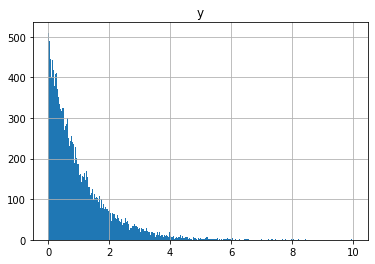

In [1]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
amostra=[]
x=[]
n=50000
for i in range(1,n):
    r=random()
    y=-np.log(r)
    x.append(i)
    amostra.append(y)
#plt.plot(x,amostra,'-o')
dados={'y':amostra}
bins=np.arange(0,10,.01)
df=pd.DataFrame(data=dados).hist(bins=bins)


Para a distribuição Gaussiana, a função inversa da função cumulativa cdf é:

$F^{-1}(X)=\mu+\sigma\sqrt{2}\textrm{erf}^{-1}(2X-1)$

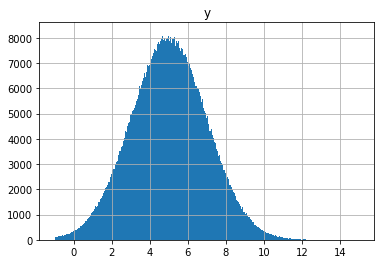

In [27]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
from scipy import special
amostra=[]
x=[]
n=4000000
mu=5
sigma=2
for i in range(1,n):
    r=random()
    y=mu+sigma*math.sqrt(2)*special.erfinv(2*r-1)
    x.append(i)
    amostra.append(y)
# plt.plot(x,amostra,'-o')
dados={'y':amostra}
bins=np.arange(-1,15,.01)
df=pd.DataFrame(data=dados).hist(bins=bins)
# df=df.sort_values(by='y',ascending=True).plot(kind='bar')

<b>Segundo método para fazer amostragem de distribuição gaussiana (transformada de Box-Muller)</b>

Considerando duas distribuições gaussianas:

$p(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{\mu-x}{\sigma})^2}$ e 
$p(y)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{\mu-y}{\sigma})^2}$

Considerando o caso $\mu=0$ e $\sigma=1$, a probabilidade conjunta das duas será:
$p(x,y)=\frac{1}{2\pi}e^{-\frac{1}{2}(x^2+y^2)}$,

Se $x^2+y^2\leq 1$ e $x^2+y^2\neq 0$   o problema tem coordenadas polares, em que $x=rcos\theta$ e $y=rsen\theta$

Reescrevendo:

$p(r)=\frac{1}{2\pi}e^{-\frac{1}{2}r^2}$,

Podemos ainda integrar para obter a função cumulativa:

$\displaystyle\int_0^r\int_0^{\theta} \frac{1}{2\pi}e^{-\frac{1}{2}r^2}rdrd\theta=\frac{\theta}{2\pi}\displaystyle\int_0^re^{-\frac{1}{2}r^2}rdr$

Então utilizando o método da distribuição acumulada inversa, uma das variáveis será:

$F^{-1}(\theta)=U_1=\frac{\theta}{2\pi}$ ou seja, $2\pi U_1=\theta$

Restando-nos apenas o segundo termo:

$\displaystyle\int_0^re^{-\frac{1}{2}r^2}rdr$

Em que podemos ainda fazer a mudança de variável $t=\frac{1}{2}r^2$ o que implica que $dt=rdr$, e teremos:

$\displaystyle\int_0^\sqrt{t} e^{-t}dt$

Que é na verdade a função exponencial, que vimos na aula passada como se amostrava pelo método da cumulativa inversa:

$t=-ln(U_2)$, ou seja, $r=\sqrt{-2ln(U_2)}$,

Sendo assim, o nosso x e y, que serão variáveis aleatórias de distribuição gaussiana, podem ser reescritos:

(1)$X=rcos(\theta)= cos(2\pi U_1)\sqrt{-2ln(U_2)}$

(2)$Y=rsen(\theta)= sen(2\pi U_1)\sqrt{-2ln(U_2)}$

As equações de cima definem o método de Box-Muller para amostrar a partir de duas distribuições gaussianas.

<b>Método polar de Marsaglia</b>

O método polar de Marsaglia permite simplificar estas equações, retirando a componente trigonométrica, considerando que:

$s=r^2=x^2+y^2=u^2+v^2$

Em que $u$ e $v$ são dois novos números aleatórios uniformemente distribuídos entre $[-1,1]$.

Podemos  reescrever assim as equações trigonométricas:

$cos\theta=\frac{u}{r}=\frac{u}{\sqrt{s}}$

$sen\theta=\frac{v}{r}=\frac{v}{\sqrt{s}}$

Identificando $\frac{\theta}{2\pi}=U_1$ e $s=U_2$, as equações (1) e (2) ficam:

(3)$X=\sqrt{-2ln(s)}\frac{u}{\sqrt{s}}=u\sqrt{\frac{-2ln(s)}{s}}$

(4)$Y=\sqrt{-2ln(s)}\frac{v}{\sqrt{s}}=v\sqrt{\frac{-2ln(s)}{s}}$



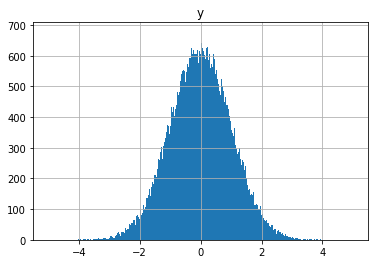

In [3]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
amostra1=[]
amostra2=[]
x=[]
n=200000
for i in range(0,n):
    r1=-1+2*random()
    r2=-1+2*random()
    s=r1**2+r2**2
    if s!=0 and s<=1:
        s1=-2*math.log(s)/s
        z1=r1*s1**0.5
        z2=r2*s1**0.5
        amostra1.append(z1)
        amostra2.append(z2)
        x.append(i)
#plt.plot(x,amostra1,'-o')
dados={'y':amostra1}
bins=np.arange(-5,5,.01)
df=pd.DataFrame(data=dados).hist(bins=bins)  

<b>Amostragem de distribuição de Poisson</b>

Para o caso da distribuição de Poisson, temos apenas que considerar que $\lambda$ é o valor médio, e que todos os tempos em que não ocorre um sucesso têm uma distribuição exponencial. Isto vem da propriedade da distribuição de Poisson. Sendo assim, basta lançar vários números aleatórios e ir multiplicando até o valor ser inferior a $\lambda$. Quando isso acontecer, o valor que obtemos é o valor de k respectivo -1 (ou seja o último a ser superior a $\lambda$.

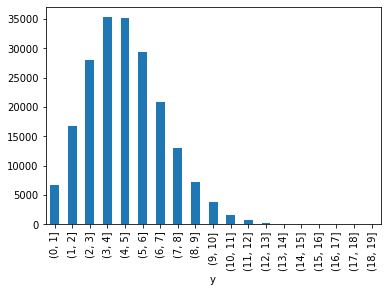

In [1]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
amostra=[]
x=[]
n=200000
lamb=5
L=math.exp(-lamb)
for i in range (0,n):
    p=1
    k=0
    while p>=L:
        r=random()
        p=p*r
        k+=1
    amostra.append(k-1)
    x.append(i)
#plt.plot(x,amostra,'-o')
dados={'y':amostra}
bins=np.arange(0,20)
df=pd.DataFrame(data=dados)
df=pd.cut(df['y'],bins=bins)
df=df.groupby(df).size().plot(kind='bar')

<b>Amostragem de distribuição binomial</b>

Para a distribuição binomial, é ainda mais simples, basta ir lançando números aleatórios, o que é equivalente a fazer um teste de Bernoulli para r<p. Cada combinação de casos em que houve k sucessos corresponde a cada ponto na nossa distribuição binomial.

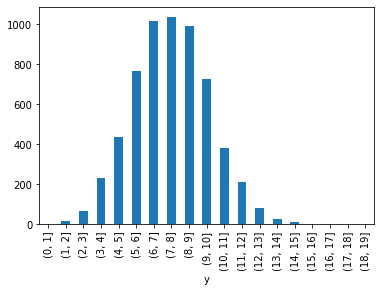

In [26]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
from random import random
amostra=[]
x=[]
n=6000
p=0.4
k=20
for i in range(0,n):
    binomial=0
    for j in range(0,k):
        r=random()
        if r<p:binomial+=1
    amostra.append(binomial)
    x.append(i)
#plt.plot(x,amostra,'-o')
dados={'y':amostra}
bins=np.arange(0,20)
df=pd.DataFrame(data=dados)
df=pd.cut(df['y'],bins=bins)
df=df.groupby(df).size().plot(kind='bar')
    

        
